In [1]:
import pandas as pd
import numpy as np
import igraph as ig
import matplotlib.pyplot as plt 

In [2]:
df_unweighted = pd.read_csv('../combined_final_unweighted.csv')
df_unweighted

,node_start,node_end,status
0,Hong Kong,Samoa,jurisdiction
1,Hong Kong,Samoa,jurisdiction
2,Hong Kong,Samoa,jurisdiction
3,Hong Kong,Samoa,jurisdiction
4,Hong Kong,Samoa,jurisdiction
...,...,...,...
338127,Indonesia,British Virgin Islands,officer_base
338128,Cook Islands,British Virgin Islands,officer_base
338129,Hong Kong,British Virgin Islands,officer_base
338130,Cook Islands,United Kingdom,officer_base


In [3]:
df_weighted = pd.read_csv('../combined_final_weighted.csv')
df_weighted

,node_start,node_end,status,weight
0,Hong Kong,Samoa,jurisdiction,2.0
1,Hong Kong,Samoa,jurisdiction,2.0
2,Hong Kong,Samoa,jurisdiction,2.0
3,Hong Kong,Samoa,jurisdiction,2.0
4,Hong Kong,Samoa,jurisdiction,2.0
...,...,...,...,...
338119,Indonesia,British Virgin Islands,officer_base,1.0
338120,Cook Islands,British Virgin Islands,officer_base,1.0
338121,Hong Kong,British Virgin Islands,officer_base,1.0
338122,Cook Islands,United Kingdom,officer_base,1.0


In [4]:
df_undir = pd.read_csv('../undirected_weighted_grouped.csv')
df_undir

,node_1,node_2,weight
0,Albania,Bahamas,4.0
1,Algeria,British Virgin Islands,2.0
2,Algeria,United Kingdom,2.0
3,Algeria,United States,1.0
4,Andorra,Bahamas,52.0
...,...,...,...
2383,Hong Kong,Zimbabwe,3.0
2384,Jersey,Zimbabwe,1.0
2385,Panama,Zimbabwe,6.0
2386,Russia,Zimbabwe,2.0


In [5]:
#plot the unweighted graph (try unweighted first)
g = ig.Graph.TupleList(df_undir.itertuples(index=False), directed=False, edge_attrs={'weight': "weight"})


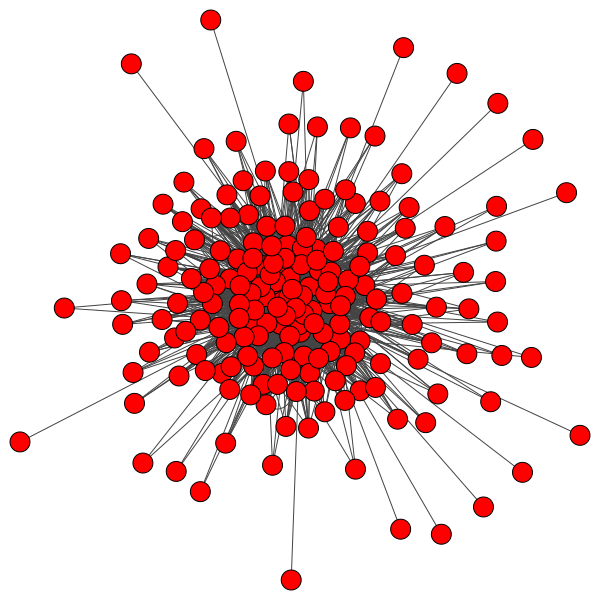

In [6]:
ig.plot(g)

In [7]:
g.diameter()

3

In [8]:
len(g.vs.indices)

196

In [9]:
#g.vs.indices
df_undir['node_1'].value_counts()

British Virgin Islands    158
Bahamas                    95
Hong Kong                  90
China                      88
Cyprus                     81
                         ... 
Malawi                      1
Dubai                       1
Cameroon                    1
Guam                        1
Papua New Guinea            1
Name: node_1, Length: 172, dtype: int64

In [10]:
uni =df_undir['node_1'].unique()

In [11]:
len(uni)

172

In [12]:
list(g.vs)

[igraph.Vertex(<igraph.Graph object at 0x7fe5bb32be50>, 0, {'name': 'Albania'}),
 igraph.Vertex(<igraph.Graph object at 0x7fe5bb32be50>, 1, {'name': 'Bahamas'}),
 igraph.Vertex(<igraph.Graph object at 0x7fe5bb32be50>, 2, {'name': 'Algeria'}),
 igraph.Vertex(<igraph.Graph object at 0x7fe5bb32be50>, 3, {'name': 'British Virgin Islands'}),
 igraph.Vertex(<igraph.Graph object at 0x7fe5bb32be50>, 4, {'name': 'United Kingdom'}),
 igraph.Vertex(<igraph.Graph object at 0x7fe5bb32be50>, 5, {'name': 'United States'}),
 igraph.Vertex(<igraph.Graph object at 0x7fe5bb32be50>, 6, {'name': 'Andorra'}),
 igraph.Vertex(<igraph.Graph object at 0x7fe5bb32be50>, 7, {'name': 'Cayman Islands'}),
 igraph.Vertex(<igraph.Graph object at 0x7fe5bb32be50>, 8, {'name': 'Cook Islands'}),
 igraph.Vertex(<igraph.Graph object at 0x7fe5bb32be50>, 9, {'name': 'Costa Rica'}),
 igraph.Vertex(<igraph.Graph object at 0x7fe5bb32be50>, 10, {'name': 'Hong Kong'}),
 igraph.Vertex(<igraph.Graph object at 0x7fe5bb32be50>, 11, {'n

In [13]:
##similar to mini-proj, try a random target 
import random
random.seed(5104)
def unweighted_Type1_random_delete(G):
    g = G.copy()
    
    nodes_removed =[]
    prop_removed =[]
    dia = []
    assort_deg = []
    degree = []
    density = []
    apl = []
    bet = []
    for i in range(len(g.vs)):
        sample = random.sample(g.vs.indices,1)
        #print(sample)
        g.delete_vertices(sample)
        
        diameter = g.diameter(directed=True)
        dia.append(diameter)
        
        asdeg = g.assortativity_degree()
        assort_deg.append(asdeg)
        
        between = g.betweenness(directed=True)
        between = sum(between)/max(len(between),1)
        bet.append(between)
        
        dense = g.density(loops=True)
        density.append(dense)
        #use strength
        deg = g.strength(mode='in')
        deg = sum(deg)/max(len(deg),1)
        degree.append(deg)
        
        avgpl = g.average_path_length()
        apl.append(avgpl)
        
        prop = round((i+1)/196,2)
        prop_removed.append(prop)
        nodes_removed.append(i+1)
        
        


    df = pd.DataFrame({'nodes_removed':nodes_removed,
                       'avg_betweenness':bet,
                       'prop_removed':prop_removed,
                       'diameter':dia,
                       'assortativity_degree':assort_deg,
                       'avg_unweighted_indegree':degree,
                       'density':density,
                       'average_path_len':apl})
    
    return(df)

In [14]:
#try another function but this time with g.diameter having weight param 
#https://igraph.org/python/api/latest/igraph._igraph.GraphBase.html#diameter

random.seed(5104)
def weighted_Type1_random_delete(G):
    g = G.copy()
    
    nodes_removed =[]
    prop_removed =[]
    dia = []
    assort_deg = []
    degree = []
    density = []
    apl = []
    bet = []
    for i in range(len(g.vs)):
        sample = random.sample(g.vs.indices,1)
        #print(sample)
        g.delete_vertices(sample)
        
        diameter = g.diameter(directed=True, weights='weight')
        dia.append(diameter)
        
        asdeg = g.assortativity_degree()
        assort_deg.append(asdeg)
        
        between = g.betweenness(directed=True, weights='weight')
        between = sum(between)/max(len(between),1)
        bet.append(between)
        
        dense = g.density(loops=True)
        density.append(dense)
        #try in-degree
        #use strength
        deg = g.strength(mode='in',weights='weight')
        deg = sum(deg)/max(len(deg),1)
        degree.append(deg)
        
        avgpl = g.average_path_length()
        apl.append(avgpl)
        
        prop = round((i+1)/196,2)
        prop_removed.append(prop)
        nodes_removed.append(i+1)
        
        


    df = pd.DataFrame({'nodes_removed':nodes_removed,
                       'prop_removed':prop_removed,
                       'diameter':dia,
                       'avg_weighted_betweenness':bet,
                       'assortativity_degree':assort_deg,
                       'avg_weighted_indegree':degree,
                       'density':density,
                       'average_path_len':apl})
    
    return(df)

In [15]:
df_type1_unweighted = unweighted_Type1_random_delete(g)
df_type1_unweighted.head()

,nodes_removed,avg_betweenness,prop_removed,diameter,assortativity_degree,avg_unweighted_indegree,density,average_path_len
0,1,88.805128,0.01,3.0,-0.556315,24.205128,0.123496,1.915517
1,2,88.221649,0.01,3.0,-0.556133,24.288660,0.124557,1.914214
2,3,87.689119,0.02,3.0,-0.555478,24.341969,0.125474,1.913428
3,4,87.197917,0.02,3.0,-0.554013,24.343750,0.126133,1.913067
4,5,86.680628,0.03,3.0,-0.553574,24.376963,0.126963,1.912428


In [16]:
df_type1_unweighted.tail()

,nodes_removed,avg_betweenness,prop_removed,diameter,assortativity_degree,avg_unweighted_indegree,density,average_path_len
191,192,0.0,0.98,0.0,NaN,0.0,0.0,NaN
192,193,0.0,0.98,0.0,NaN,0.0,0.0,NaN
193,194,0.0,0.99,0.0,NaN,0.0,0.0,NaN
194,195,0.0,0.99,0.0,NaN,0.0,0.0,NaN
195,196,0.0,1.00,NaN,NaN,0.0,NaN,NaN


In [17]:
df_type1_weighted = weighted_Type1_random_delete(g)
df_type1_weighted.head()

,nodes_removed,prop_removed,diameter,avg_weighted_betweenness,assortativity_degree,avg_weighted_indegree,density,average_path_len
0,1,0.01,26.0,192.485242,-0.555287,5676.569231,0.124594,1.913931
1,2,0.01,26.0,191.790607,-0.556025,5701.623711,0.124399,1.914481
2,3,0.02,26.0,191.599206,-0.557071,5686.906736,0.123872,1.915425
3,4,0.02,26.0,190.783371,-0.558547,5715.468750,0.124298,1.915194
4,5,0.03,26.0,189.921771,-0.557692,5745.125654,0.125164,1.914577


In [18]:
df_type1_weighted.tail(15)

,nodes_removed,prop_removed,diameter,avg_weighted_betweenness,assortativity_degree,avg_weighted_indegree,density,average_path_len
181,182,0.93,58.0,4.214286,-0.703963,752.714286,0.161905,1.666667
182,183,0.93,58.0,3.153846,-0.696415,810.461538,0.175824,1.555556
183,184,0.94,58.0,2.583333,-0.668848,877.666667,0.192308,1.464286
184,185,0.94,58.0,2.000000,-0.643192,956.727273,0.212121,1.333333
185,186,0.95,58.0,2.200000,-0.643192,1052.400000,0.254545,1.333333
186,187,0.95,63.0,1.000000,-0.763780,964.444444,0.177778,1.466667
187,188,0.96,63.0,1.125000,-0.763780,1085.000000,0.222222,1.466667
188,189,0.96,63.0,1.285714,-0.763780,1240.000000,0.285714,1.466667
189,190,0.97,63.0,1.500000,-0.763780,1446.666667,0.380952,1.466667
190,191,0.97,4240.0,0.600000,-1.000000,1706.400000,0.200000,1.500000


### Targeted attack

In [19]:
##try sort by indegree 
temp_df = pd.DataFrame({'Node_indice':g.vs.indices,
                         'Nodes':g.vs['name'],
                         'In_Degree':g.strength(mode='in',weights='weight')})

In [20]:
#sort by largest degree 
temp_df = temp_df.sort_values(by='In_Degree',ascending=False)

In [21]:
temp_df.head(50)

,Node_indice,Nodes,In_Degree
3,3,British Virgin Islands,287863.5
10,10,Hong Kong,113074.5
15,15,Panama,109901.0
30,30,Switzerland,77214.5
1,1,Bahamas,40701.5
4,4,United Kingdom,38073.5
122,122,Taiwan,34930.5
18,18,Seychelles,32602.0
41,41,Jersey,29869.5
22,22,China,25281.0


In [22]:
temp_df.tail(50)

,Node_indice,Nodes,In_Degree
187,187,Turkmenistan,20.0
79,79,Cambodia,19.0
31,31,Armenia,17.0
116,116,Haiti,16.0
145,145,Mongolia,16.0
126,126,Iran,16.0
141,141,Mali,16.0
69,69,Botswana,14.0
158,158,Oman,14.0
110,110,Ghana,14.0


In [23]:
#extract out by Node
order_of_del = temp_df['Nodes'].tolist()

In [24]:
#print the list to check it
order_of_del

['British Virgin Islands',
 'Hong Kong',
 'Panama',
 'Switzerland',
 'Bahamas',
 'United Kingdom',
 'Taiwan',
 'Seychelles',
 'Jersey',
 'China',
 'Russia',
 'Luxembourg',
 'United States',
 'Niue',
 'Singapore',
 'Samoa',
 'United Arab Emirates',
 'Guernsey',
 'Cyprus',
 'Isle of Man',
 'Uruguay',
 'Cayman Islands',
 'British Anguilla',
 'Monaco',
 'Bermuda',
 'Indonesia',
 'Barbados',
 'Liechtenstein',
 'Gibraltar',
 'Ireland',
 'Latvia',
 'Malaysia',
 'Canada',
 'Colombia',
 'Ecuador',
 'Belize',
 'Thailand',
 'Jordan',
 'Brazil',
 'Mauritius',
 'Nevada',
 'Spain',
 'Guatemala',
 'Saint Kitts and Nevis',
 'Costa Rica',
 'Venezuela',
 'Malta',
 'Estonia',
 'Israel',
 'Australia',
 'Cook Islands',
 'India',
 'US Virgin Islands',
 'Philippines',
 'Dominican Republic',
 'Lebanon',
 'Ukraine',
 'Japan',
 'Andorra',
 'France',
 'Italy',
 'Labuan',
 'Germany',
 'Netherlands',
 'Argentina',
 'Greece',
 'New Zealand',
 'Portugal',
 'Macao',
 'El Salvador',
 'South Africa',
 'South Korea',
 '

In [25]:
def unweighted_Type2_targeted_del(G):
    g = G.copy()
    
    num_node_removed = []
    prop_removed=[]
    node_removed = []
    dia = []
    assort_deg = []
    degree = []
    density = []
    apl = []
    bet = []
    for i in range(len(g.vs)):
        g.delete_vertices(order_of_del[i])
        #print(order_of_del[i])
        diameter = g.diameter(directed=True)
        dia.append(diameter)
        
        asdeg = g.assortativity_degree()
        assort_deg.append(asdeg)
        
        between = g.betweenness(directed=True)
        between = sum(between)/max(len(between),1)
        bet.append(between)
        
        dense = g.density(loops=True)
        density.append(dense)
        
        #use strength
        deg = g.strength(mode='in')
        deg = sum(deg)/max(len(deg),1)
        degree.append(deg)
        
        avgpl = g.average_path_length()
        apl.append(avgpl)
        
        num_node_removed.append(i+1)
        prop = round((i+1)/196,2)
        prop_removed.append(prop)
        node_removed.append(order_of_del[i])


    df = pd.DataFrame({'num_nodes_removed':num_node_removed,
                       'prop_removed':prop_removed,
                       'node_removed':node_removed,
                       'avg_betweenness':bet,
                       'diameter':dia,
                       'assortativity_degree':assort_deg,
                       'avg_unweighted_indegree':degree,
                       'density':density,
                       'average_path_len':apl})
    
    return(df)

In [26]:
#Weighted on diameter
def weighted_Type2_targeted_del(G):
    g = G.copy()
    
    num_node_removed = []
    prop_removed=[]
    node_removed = []
    dia = []
    assort_deg = []
    degree = []
    density = []
    apl = []
    bet = []
    for i in range(len(g.vs)):
        g.delete_vertices(order_of_del[i])
        #print(order_of_del[i])
        diameter = g.diameter(directed=True, weights='weight')
        dia.append(diameter)
        
        asdeg = g.assortativity_degree()
        assort_deg.append(asdeg)
        
        dense = g.density(loops=True)
        density.append(dense)
        
        between = g.betweenness(directed=True, weights='weight')
        between = sum(between)/max(len(between),1)
        bet.append(between)
        
        #use strength
        deg = g.strength(mode='in',weights='weight')
        deg = sum(deg)/max(len(deg),1)
        degree.append(deg)
        
        avgpl = g.average_path_length()
        apl.append(avgpl)
        
        num_node_removed.append(i+1)
        prop = round((i+1)/196,2)
        prop_removed.append(prop)
        node_removed.append(order_of_del[i])


    df = pd.DataFrame({'num_nodes_removed':num_node_removed,
                       'prop_removed':prop_removed,
                       'node_removed':node_removed,
                       'avg_weighted_betweenness':bet,
                       'diameter':dia,
                       'assortativity_degree':assort_deg,
                       'avg_weighted_indegree':degree,
                       'density':density,
                       'average_path_len':apl})
    
    return(df)

In [27]:
df_type2_unweighted = unweighted_Type2_targeted_del(g)
df_type2_unweighted.head()

,num_nodes_removed,prop_removed,node_removed,avg_betweenness,diameter,assortativity_degree,avg_unweighted_indegree,density,average_path_len
0,1,0.01,British Virgin Islands,87.733333,4.0,-0.553123,22.615385,0.115385,1.962963
1,2,0.01,Hong Kong,87.608247,4.0,-0.544085,21.257732,0.109014,1.977287
2,3,0.02,Panama,83.974093,4.0,-0.536278,19.792746,0.102024,2.006021
3,4,0.02,Switzerland,83.776042,4.0,-0.540493,19.375000,0.100389,2.009667
4,5,0.03,Bahamas,82.722513,4.0,-0.535940,18.460733,0.096150,2.014381


In [28]:
df_type2_unweighted.tail()

,num_nodes_removed,prop_removed,node_removed,avg_betweenness,diameter,assortativity_degree,avg_unweighted_indegree,density,average_path_len
191,192,0.98,Bhutan,0.0,0.0,NaN,0.0,0.0,NaN
192,193,0.98,Yemen,0.0,0.0,NaN,0.0,0.0,NaN
193,194,0.99,Palestine,0.0,0.0,NaN,0.0,0.0,NaN
194,195,0.99,Northern Mariana Islands,0.0,0.0,NaN,0.0,0.0,NaN
195,196,1.00,Benin,0.0,NaN,NaN,0.0,NaN,NaN


In [29]:
df_type2_weighted = weighted_Type2_targeted_del(g)
df_type2_weighted.head(15)

,num_nodes_removed,prop_removed,node_removed,avg_weighted_betweenness,diameter,assortativity_degree,avg_weighted_indegree,density,average_path_len
0,1,0.01,British Virgin Islands,174.754582,22.0,-0.553123,2724.338462,0.115385,1.962963
1,2,0.01,Hong Kong,172.830254,196.0,-0.544085,2255.783505,0.109014,1.977287
2,3,0.02,Panama,156.354125,22.0,-0.536278,1261.699482,0.102024,2.006021
3,4,0.02,Switzerland,156.996497,22.0,-0.540493,1122.156250,0.100389,2.009667
4,5,0.03,Bahamas,153.973743,22.0,-0.535940,879.078534,0.096150,2.014381
5,6,0.03,United Kingdom,153.054080,138.0,-0.527419,715.084211,0.089667,2.051494
6,7,0.04,Taiwan,152.403220,138.0,-0.532206,620.211640,0.087942,2.055146
7,8,0.04,Seychelles,139.829352,138.0,-0.525055,447.335106,0.083361,2.042772
8,9,0.05,Jersey,140.296143,138.0,-0.528701,436.080214,0.081124,2.049780
9,10,0.05,China,136.648775,138.0,-0.518204,368.413978,0.076189,2.062232


In [30]:
df_type2_weighted.tail(15)

,num_nodes_removed,prop_removed,node_removed,avg_weighted_betweenness,diameter,assortativity_degree,avg_weighted_indegree,density,average_path_len
181,182,0.93,Laos,0.0,0.0,NaN,0.0,0.0,NaN
182,183,0.93,Guam,0.0,0.0,NaN,0.0,0.0,NaN
183,184,0.94,Guinea,0.0,0.0,NaN,0.0,0.0,NaN
184,185,0.94,Saint Martin (French part),0.0,0.0,NaN,0.0,0.0,NaN
185,186,0.95,Sudan,0.0,0.0,NaN,0.0,0.0,NaN
186,187,0.95,Central African Republic,0.0,0.0,NaN,0.0,0.0,NaN
187,188,0.96,Cameroon,0.0,0.0,NaN,0.0,0.0,NaN
188,189,0.96,Norfolk Island,0.0,0.0,NaN,0.0,0.0,NaN
189,190,0.97,Uganda,0.0,0.0,NaN,0.0,0.0,NaN
190,191,0.97,Sint Maarten (Dutch part),0.0,0.0,NaN,0.0,0.0,NaN


#### Unweighted

In [31]:
## Commented out to not confuse; use the weighted one below 

#Try plotting unweighted
#fig, ax = plt.subplots(1,2,figsize=(14,6),sharey=True)
#ax2_1 = ax[0].twinx()
#ax[0].plot('prop_removed','diameter',data=df_type1_unweighted,ls='--',color='darkblue')
#ax[0].plot('prop_removed','density',data=df_type1_unweighted,ls='--',color='darkviolet')
#ax[0].plot('prop_removed','avg_betweenness',data=df_type1_unweighted,ls='--',color='darkgreen')
#ax2_1.plot('prop_removed','avg_unweighted_indegree',data=df_type1_unweighted,ls='--',color='darkred')
#ax[0].plot('prop_removed','assortativity_degree',data=df_type1_unweighted,ls='--',color='darkturquoise')
#ax[0].plot('prop_removed','average_path_len',data=df_type1_unweighted,ls='--',color='darkorange')
#ax[0].legend(loc='upper right')
#ax[0].set_xlabel('Proportion of nodes removed')
#ax[0].set_title('Random deletion')
#ax2_1.tick_params('y',colors='darkred')
#ax2_1.set_ylabel('Avg inDegree')
#ax2_1.legend(loc='upper left')

#ax2_2 = ax[1].twinx()
#ax[1].plot('prop_removed','diameter',data=df_type2_unweighted,ls='--',color='blue')
#ax[1].plot('prop_removed','density',data=df_type2_unweighted,ls='--',color='violet')
#ax[1].plot('prop_removed','avg_betweenness',data=df_type2_unweighted,ls='--',color='green')
#ax2_2.plot('prop_removed','avg_unweighted_indegree',data=df_type2_unweighted,ls='--',color='red')
#ax[1].plot('prop_removed','assortativity_degree',data=df_type2_unweighted,ls='--',color='turquoise')
#ax[1].plot('prop_removed','average_path_len',data=df_type2_unweighted,ls='--',color='orange')
#ax[1].legend(loc='upper right')
#ax[1].set_xlabel('Proportion of nodes removed')
#ax[1].set_title('Targeted deletion')
#ax2_2.tick_params('y',colors='darkred')
#ax2_2.set_ylabel('Avg inDegree')
#ax2_2.legend(loc='upper left')
#plt.show()

#### Weighted

Weighted has to set y-limit because of huge range

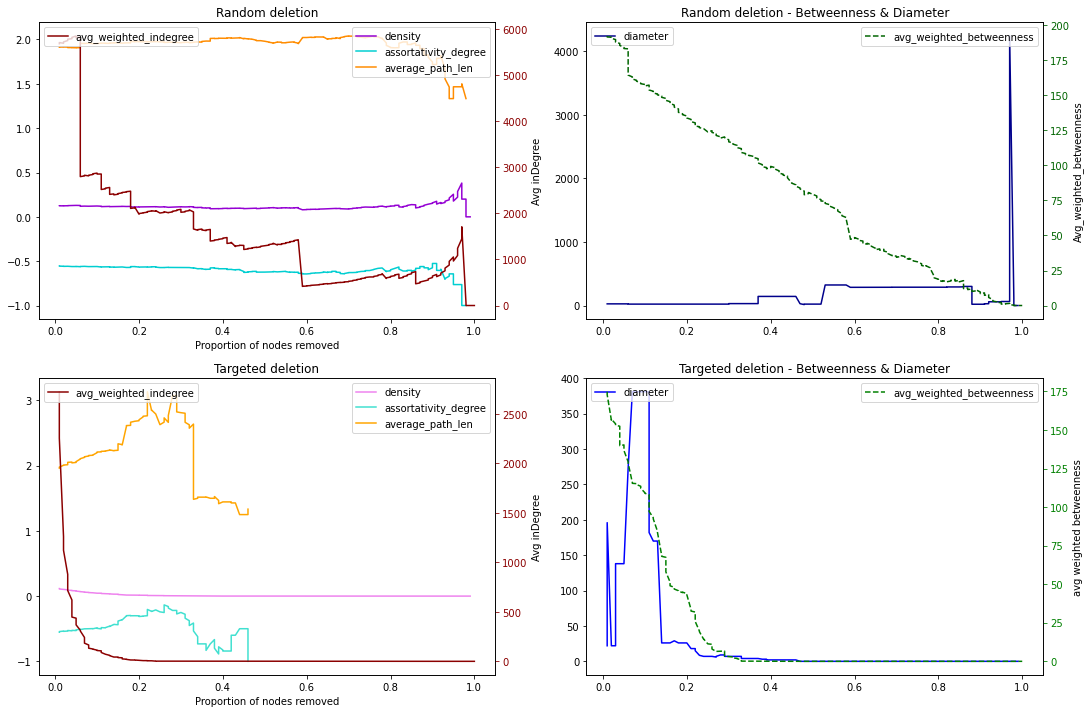

In [32]:
#Same but weighted
#Don't share y axis for type2
fig, ax = plt.subplots(2,2,figsize=(18,12),sharey=False)

#Random attack LHS graphs

ax[0,1].plot('prop_removed','diameter',data=df_type1_weighted,ls='-',color='darkblue')
ax[0,0].plot('prop_removed','density',data=df_type1_weighted,ls='-',color='darkviolet')
ax[0,0].plot('prop_removed','assortativity_degree',data=df_type1_weighted,ls='-',color='darkturquoise')
ax[0,0].plot('prop_removed','average_path_len',data=df_type1_weighted,ls='-',color='darkorange')
ax[0,0].legend(loc='upper right')
ax[0,0].set_xlabel('Proportion of nodes removed')
ax[0,0].set_title('Random deletion')

ax2_1 = ax[0,0].twinx()
ax2_1.plot('prop_removed','avg_weighted_indegree',data=df_type1_weighted,ls='-',color='darkred')
ax2_1.tick_params('y',colors='darkred')
ax2_1.set_ylabel('Avg inDegree')
ax2_1.legend(loc='upper left')

#Random attack RHS Graphs - Betweenness & Diameter
ax[0,1].set_title('Random deletion - Betweenness & Diameter')
ax[0,1].legend(loc='upper left')

ax_bet_rand = ax[0,1].twinx()
ax_bet_rand.plot('prop_removed','avg_weighted_betweenness',data=df_type1_weighted,ls='--',color='darkgreen')
ax_bet_rand.tick_params('y',colors='darkgreen')
ax_bet_rand.set_ylabel('Avg_weighted_betweenness')
ax_bet_rand.legend(loc='upper right')


#Targeted attack LHS Graphs

ax[1,1].plot('prop_removed','diameter',data=df_type2_weighted,ls='-',color='blue')
ax[1,0].plot('prop_removed','density',data=df_type2_weighted,ls='-',color='violet')
ax[1,0].plot('prop_removed','assortativity_degree',data=df_type2_weighted,ls='-',color='turquoise')
ax[1,0].plot('prop_removed','average_path_len',data=df_type2_weighted,ls='-',color='orange')
ax[1,0].legend(loc='upper right')
ax[1,0].set_xlabel('Proportion of nodes removed')
ax[1,0].set_title('Targeted deletion')

ax2_2 = ax[1,0].twinx()
ax2_2.plot('prop_removed','avg_weighted_indegree',data=df_type2_weighted,ls='-',color='darkred')
ax2_2.set_ylabel('Avg inDegree')
ax2_2.legend(loc='upper left')
ax2_2.tick_params('y',colors='darkred')


#Targeted attack RHS Graphs - Betweenness & Diameter 

ax[1,1].set_title('Targeted deletion - Betweenness & Diameter')
ax[1,1].legend(loc='upper left')

ax_bet_tar = ax[1,1].twinx()
ax_bet_tar.plot('prop_removed','avg_weighted_betweenness',data=df_type2_weighted,ls='--',color='green')
ax_bet_tar.tick_params('y',colors='green')
ax_bet_tar.set_ylabel('avg weighted betweenness')
ax_bet_tar.legend(loc='upper right')
plt.show()